In [14]:
import os, sys
sys.path.append('../src/')

from copulae1 import *

import json
with open('../src/configs/BBT_Tiingo_MM.json','r') as file:
    config = json.load(file)
config
data_name = config['data_name']
calibration_method  = config['calibration_method']
OHR1 = pd.read_csv('../results/'+data_name +'/'+calibration_method+'/OHR.csv')

copulae_names = np.unique(OHR1.copula)
copulae_names = np.delete(copulae_names,copulae_names=='t_Copula_Capped',0) # Remove t copula capped
OHR1.head()

risk_measure_names = np.unique(OHR1.loc[:,'risk measure'])

In [15]:
rm = risk_measure_names[0]
print(risk_measure_names)

['ERM k=10' 'ES q=0.01' 'ES q=0.05' 'VaR q=0.01' 'VaR q=0.05' 'Variance']


Text(0.5, 1.0, 'OHR minimizing VaR q=0.05')

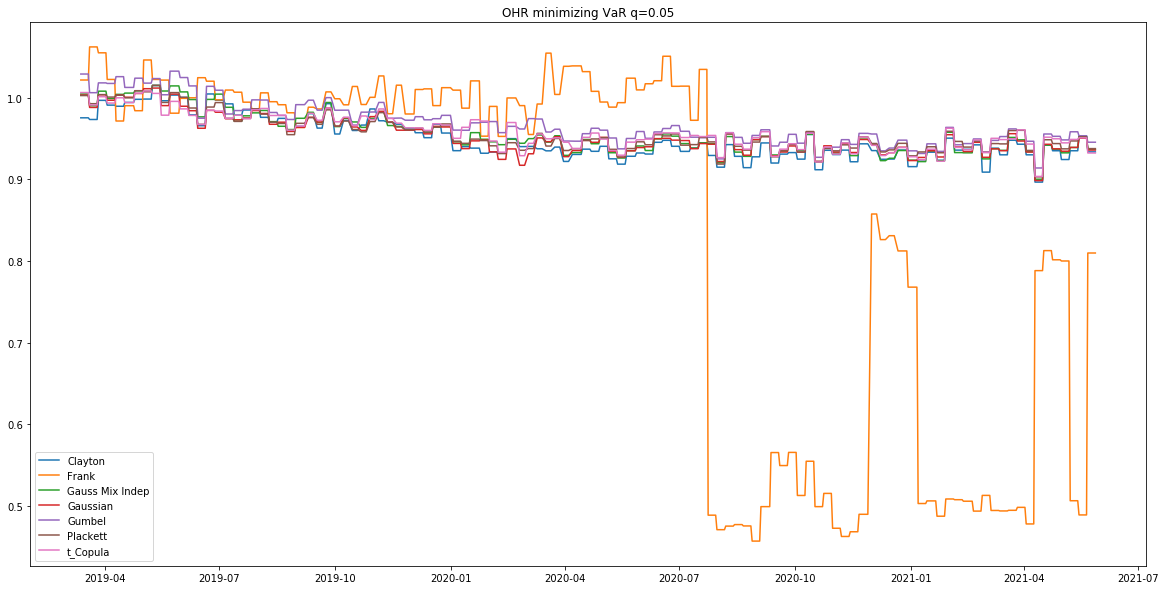

In [17]:
plt.figure(figsize=(20,10))
files1 = np.unique(OHR1.file)
rm = 'VaR q=0.05'
for copula in copulae_names:
    to_plot1 = []
    for file in files1:
        try:
            testing_data = pd.read_csv("../processed_data/"+data_name+'/test/'+file)
        except:
            continue
        testing_data.Date = pd.to_datetime(testing_data.Date)
        f = OHR1.file == file
        r = OHR1.loc[:,'risk measure'] == rm
        c = OHR1.copula == copula
        testing_data.loc[:,'OHR'] = OHR1.loc[f&r&c,'OHR'].values[0]

        to_plot1.append(testing_data)

    to_plot1 = pd.concat(to_plot1)
    to_plot1 = to_plot1.sort_values('Date')
    plt.plot(to_plot1.Date, to_plot1.OHR, label=copula)
plt.legend()
plt.title('OHR minimizing %s'%rm)

In [4]:
with open('../src/configs/BBT_Tiingo_MM.json','r') as file:
    config = json.load(file)
config
data_name = config['data_name']
calibration_method  = config['calibration_method']
OHR2 = pd.read_csv('../results/'+data_name +'/'+calibration_method+'/OHR.csv')
OHR2

,Unnamed: 0,file,risk measure,OHR,copula
0,0,97.csv,Variance,0.978223,Gaussian
1,1,97.csv,ERM k=10,0.980859,Gaussian
2,2,97.csv,ES q=0.01,0.978125,Gaussian
3,3,97.csv,ES q=0.05,0.981543,Gaussian
4,4,97.csv,VaR q=0.01,0.981641,Gaussian
...,...,...,...,...,...
5371,667,71.csv,ERM k=10,0.972363,Gauss Mix Indep
5372,668,71.csv,ES q=0.01,0.976758,Gauss Mix Indep
5373,669,71.csv,ES q=0.05,0.972852,Gauss Mix Indep
5374,670,71.csv,VaR q=0.01,0.975586,Gauss Mix Indep


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'OHR that minimize ERM k=10')

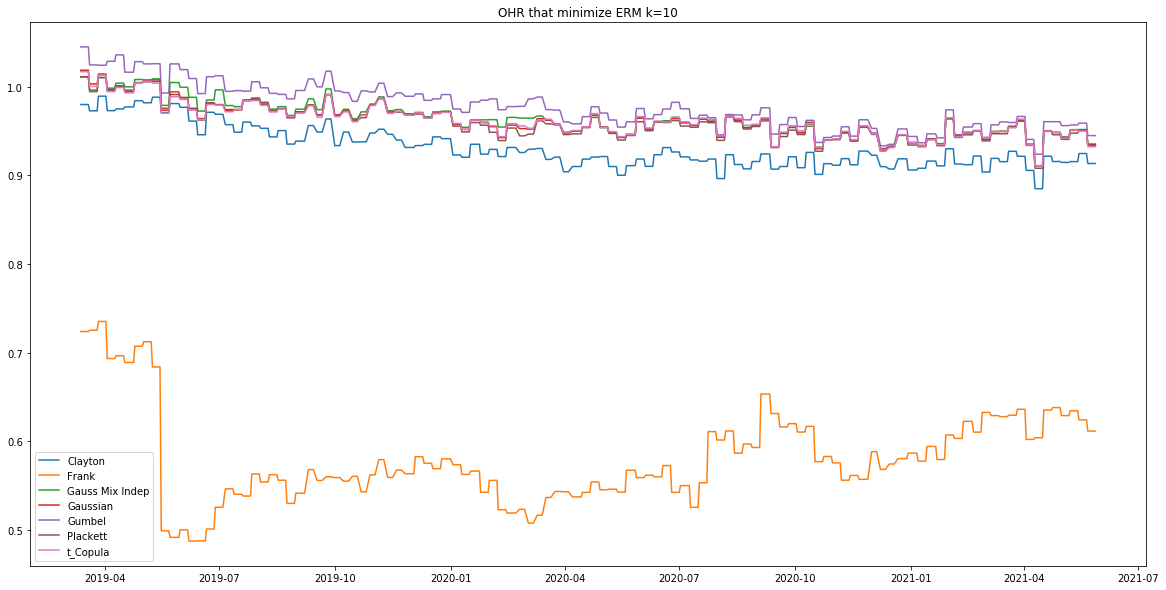

In [5]:
plt.figure(figsize=(20,10))
files2 = np.unique(OHR2.file)
for copula in copulae_names:
    to_plot2 = []
    for file in files2:
        try:
            testing_data = pd.read_csv("../processed_data/"+data_name+'/test/'+file)
        except:
            continue
        testing_data.Date = pd.to_datetime(testing_data.Date)
        f = OHR2.file == file
        r = OHR2.loc[:,'risk measure'] == rm
        c = OHR2.copula == copula
        testing_data.loc[:,'OHR'] = OHR2.loc[f&r&c,'OHR'].values[0]

        to_plot2.append(testing_data)

    to_plot2 = pd.concat(to_plot2)
    to_plot2 = to_plot2.sort_values('Date')
    plt.plot(to_plot2.Date, to_plot2.OHR, label=copula)
plt.legend()
plt.title('OHR minimizing %s'%rm)

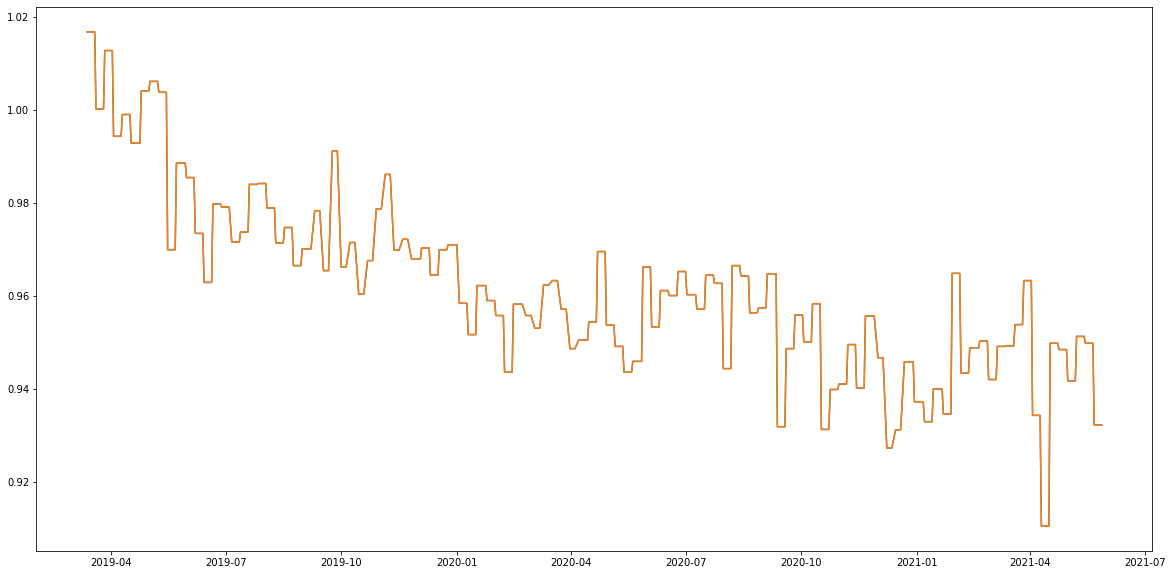

In [24]:
plt.figure(figsize=(20,10))

plt.plot(to_plot1.Date, to_plot1.OHR, label=copula)
plt.plot(to_plot2.Date, to_plot2.OHR, label=copula)

Text(0.5, 1.0, 'Gaussian')

<Figure size 720x360 with 0 Axes>

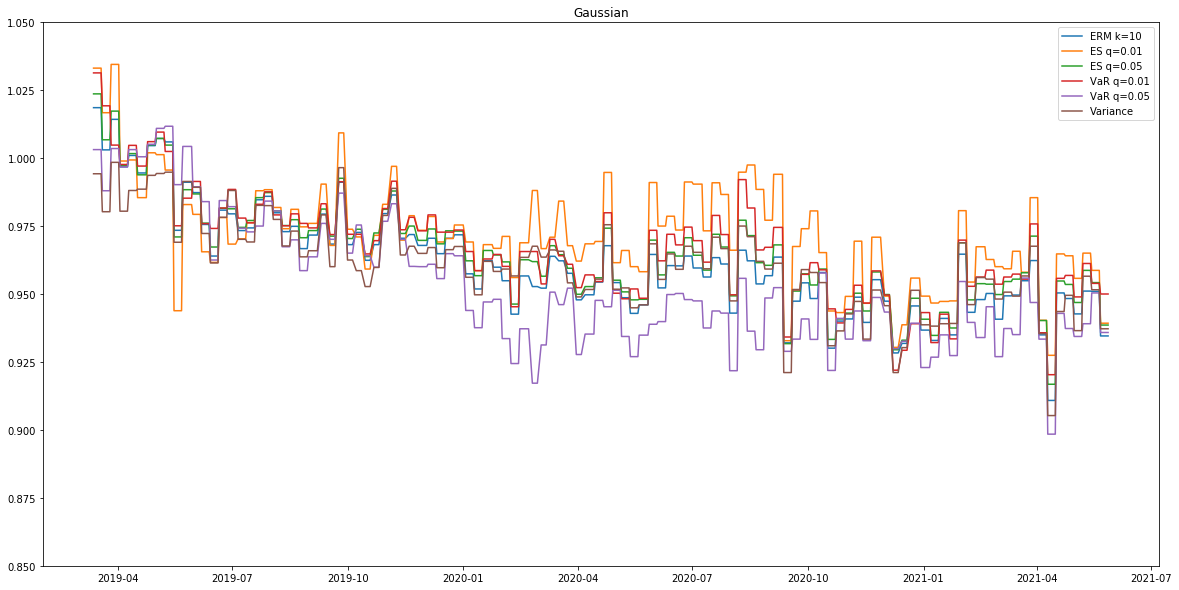

In [13]:
plt.figure(figsize=(10,5))
files1 = np.unique(OHR1.file)
# for copula in copulae_names:

copula = 'Gaussian'
plt.figure(figsize=(20,10))
for rm in risk_emasre_names:
    to_plot1 = []
    for file in files1:
        try:
            testing_data = pd.read_csv("../processed_data/"+data_name+'/test/'+file)
        except:
            continue
        testing_data.Date = pd.to_datetime(testing_data.Date)
        f = OHR1.file == file
        r = OHR1.loc[:,'risk measure'] == rm
        c = OHR1.copula == copula
        testing_data.loc[:,'OHR'] = OHR1.loc[f&r&c,'OHR'].values[0]

        to_plot1.append(testing_data)

    to_plot1 = pd.concat(to_plot1)
    to_plot1 = to_plot1.sort_values('Date')
    plt.plot(to_plot1.Date, to_plot1.OHR, label=rm)
#     plt.ylim((0,1.3))
plt.ylim((0.85,1.05))
plt.legend()
plt.title('%s'%copula)

In [19]:
copulae_names

array(['Clayton', 'Frank', 'Gauss Mix Indep', 'Gaussian', 'Gumbel',
       'Plackett', 't_Copula'], dtype=object)

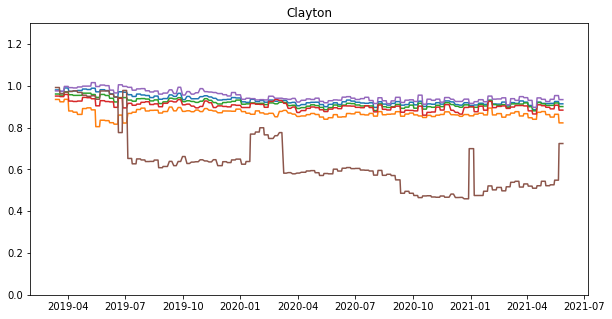

In [12]:
plt.figure(figsize=(10,5))
files1 = np.unique(OHR1.file)
# for copula in copulae_names:

for copula in copulae_names[:1]:

    for rm in risk_emasre_names:
        to_plot1 = []
        for file in files1:
            try:
                testing_data = pd.read_csv("../processed_data/"+data_name+'/test/'+file)
            except:
                continue
            testing_data.Date = pd.to_datetime(testing_data.Date)
            f = OHR1.file == file
            r = OHR1.loc[:,'risk measure'] == rm
            c = OHR1.copula == copula
            testing_data.loc[:,'OHR'] = OHR1.loc[f&r&c,'OHR'].values[0]

            to_plot1.append(testing_data)

        to_plot1 = pd.concat(to_plot1)
        to_plot1 = to_plot1.sort_values('Date')
        plt.plot(to_plot1.Date, to_plot1.OHR, label=rm)
        plt.ylim((0,1.3))
        plt.title(copula)
#     plt.savefig('plots/'+copula+'.png', transparent=True)